In [82]:
import numpy as np 
import matplotlib.pyplot as plt
import glob 
from scipy.io.wavfile import read
import IPython.display as ipd
import librosa
import librosa.display
import librosa.feature
import pickle
import sklearn

import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Lambda,Input, concatenate, Conv2DTranspose, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization 
from keras.utils import np_utils
from keras.utils import to_categorical
from keras import optimizers 
from keras.models import load_model
from keras.models import model_from_json

import keras.backend as K 
print('Image ordering is tf check: ',K.image_dim_ordering())

Image ordering is tf check:  tf


### Reconstructing model from json 

In [83]:
# model reconstruction from JSON:
json_string = pickle.load( open( "models/model10_json.pkl", "rb" ) )
model = model_from_json(json_string)
model.load_weights('models/model10_weights.h5')

In [93]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 128, 51, 1)        4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 51, 32)       320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 51, 32)       128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 25, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 25, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 12, 64)        0         
__________

### Loading test files and label map 

A dictionary is made to retrieve the actual word from the predicted labels.

In [2]:
test_files = sorted(glob.glob('./test/audio/*.wav'))
print('Number of test files: ',len(test_files))

#Labels map and dictionary
labels_map = np.load('my_way/labels_map.npy')
labels_dict = {0:'down',1:'go',2:'left',3:'no',4:'off',5:'on',6:'right',7:'stop',8:'up',9:'yes',10:'unknown',11:'silence'}
np.save('my_way/labels_dict.npy',labels_dict)

Number of test files:  158538


### Testing and visualizing some test files 

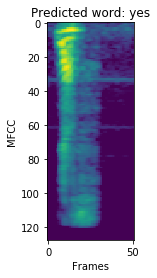

In [125]:
#Choosing a random file 
ch = np.random.randint(0,len(test_files))

#Loading file
file = test_files[ch]
sr, bits = read(file)
        
#If the number of bits is less than 16000, the array is padded with zeros
if len(bits)!=16000:
    b_p = np.lib.pad(bits, (0,16000-len(bits)), 'constant', constant_values=(0, 0))
    y=b_p
else: 
    y=bits

#Feature extraction, prediction and visualization
X_test_sample = np.zeros((1,128,51))
S = librosa.feature.melspectrogram(y=y, sr=16000, n_mels=128, hop_length=320, fmax=8000)
X_test_sample[0] = librosa.logamplitude(S,ref_power=np.max)
plt.imshow(X_test_sample.reshape(128,51))

p = model.predict(X_test_sample.reshape(1,128,51,1))
label = int(np.where(p==np.max(p))[1].squeeze())
plt.title('Predicted word: '+str(labels_dict[label]))
plt.xlabel('Frames')
plt.ylabel('MFCC')
plt.show()

ipd.Audio(y,rate=16000)

### Saving predictions to a csv file

In [ ]:
import csv
with open('predictions_model10.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    #Writing header
    spamwriter.writerow(['fname','label'])
    
    f_n = 0
    for tef in test_files:
        
        #Loading test file using librosa
        sr, bits = read(tef)
        
        #If the number of bits is less than 16000, the array is padded with zeros
        if len(bits)!=16000:
            b_p = np.lib.pad(bits, (0,16000-len(bits)), 'constant', constant_values=(0, 0))
            y=b_p
        else: 
            y=bits
        
        #Array for storing the MFCC features of the test file
        X_test_sample = np.zeros((1,128,51))
        
        #Extracting MFCC features for test file
        S = librosa.feature.melspectrogram(y=y, sr=16000, n_mels=128, hop_length=320, fmax=8000)
        X_test_sample[0] = librosa.logamplitude(S,ref_power=np.max)
        
        #Predicting 
        p = model.predict(X_test_sample.reshape(1,128,51,1))
        #Extracting predicted label
        label = int(np.where(p==np.max(p))[1].squeeze())
        
        #Extracting file name 
        file = tef
        cleaned_name = file.replace("./test/audio\\", "")
        
        #Writing file name and predicted word to the csv file 
        spamwriter.writerow([cleaned_name,labels_dict[label]])
        
        #Next file
        f_n+=1
        
        #Keeping track of the process
        if f_n%100==0:
            print('Done '+str(f_n)+ ' Test files')

Done 100 Test files
Done 200 Test files
Done 300 Test files
Done 400 Test files
Done 500 Test files
Done 600 Test files
Done 700 Test files
Done 800 Test files
Done 900 Test files
Done 1000 Test files
Done 1100 Test files
Done 1200 Test files
Done 1300 Test files
Done 1400 Test files
Done 1500 Test files
Done 1600 Test files
Done 1700 Test files
Done 1800 Test files
Done 1900 Test files
Done 2000 Test files
Done 2100 Test files
Done 2200 Test files
Done 2300 Test files
Done 2400 Test files
Done 2500 Test files
Done 2600 Test files
Done 2700 Test files
Done 2800 Test files
Done 2900 Test files
Done 3000 Test files
Done 3100 Test files
Done 3200 Test files
Done 3300 Test files
Done 3400 Test files
Done 3500 Test files
Done 3600 Test files
Done 3700 Test files
Done 3800 Test files
Done 3900 Test files
Done 4000 Test files
Done 4100 Test files
Done 4200 Test files
Done 4300 Test files
Done 4400 Test files
Done 4500 Test files
Done 4600 Test files
Done 4700 Test files
Done 4800 Test files
D